## Ultimate Inc data challenge

Part 1 ‑ Exploratory data analysis
* The attached logins.json file contains (simulated) timestamps of user logins in a particular
  geographic location. 
* Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.
* Please report/illustrate important features of the demand,
  such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (18, 8)

In [2]:
login_df = pd.read_json('C:/ultimate_challenge/logins.json')

In [3]:
login_df.info

<bound method DataFrame.info of                login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
5     1970-01-01 20:21:41
6     1970-01-01 20:12:16
7     1970-01-01 20:35:47
8     1970-01-01 20:35:38
9     1970-01-01 20:47:52
10    1970-01-01 20:26:05
11    1970-01-01 20:31:03
12    1970-01-01 20:34:46
13    1970-01-01 20:36:34
14    1970-01-01 20:39:25
15    1970-01-01 20:40:37
16    1970-01-01 20:34:58
17    1970-01-01 20:43:59
18    1970-01-01 20:47:46
19    1970-01-01 20:46:34
20    1970-01-01 20:56:07
21    1970-01-01 20:49:12
22    1970-01-01 20:59:06
23    1970-01-01 20:59:59
24    1970-01-01 21:15:01
25    1970-01-01 21:09:24
26    1970-01-01 21:19:24
27    1970-01-01 21:20:53
28    1970-01-01 21:29:19
29    1970-01-01 21:58:05
...                   ...
93112 1970-04-13 17:38:24
93113 1970-04-13 17:37:19
93114 1970-04-13 17:45:35
93115 1970-04-13 17:39:02
93116 1970-04-13 17:39:56
93117 

### Part 1-  EDA

In [4]:
login_df.shape

(93142, 1)

In [5]:
login_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


#### Aggregate login counts based on 15 min time interval

In [6]:
login_df.set_index('login_time', inplace=True)
login_df['count'] = 1
login_df = login_df.resample('15T').sum()
login_df.head(5)

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


#### Aggregate login counts based on Hourly time interval

In [7]:
login_dfh = login_df.resample('H').sum()
login_dfh.head(5)

,count
login_time,
1970-01-01 20:00:00,24.0
1970-01-01 21:00:00,9.0
1970-01-01 22:00:00,21.0
1970-01-01 23:00:00,58.0
1970-01-02 00:00:00,53.0


#### Aggregate login counts on daily basis

In [8]:
login_dfd = login_df.resample('D').sum()
login_dfd.head(5)

,count
login_time,
1970-01-01,112.0
1970-01-02,681.0
1970-01-03,793.0
1970-01-04,788.0
1970-01-05,459.0


#### Aggregate login counts on monthly basis

In [9]:
login_dfm = login_df.resample('M').sum()
login_dfm.head(5)

,count
login_time,
1970-01-31,21239.0
1970-02-28,24673.0
1970-03-31,33723.0
1970-04-30,13507.0


#### Visualizing 

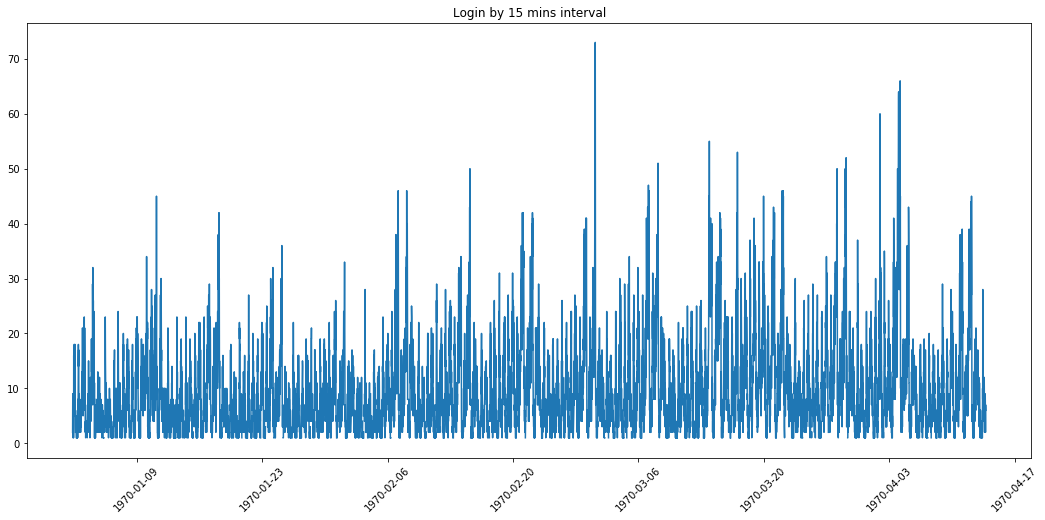

In [10]:
import matplotlib.pyplot as plt 
plt.title('Login by 15 mins interval')
plt.plot(login_df)
plt.xticks(rotation=45)
plt.show()

#### the results are overlapping, plotting it for daily intervals.

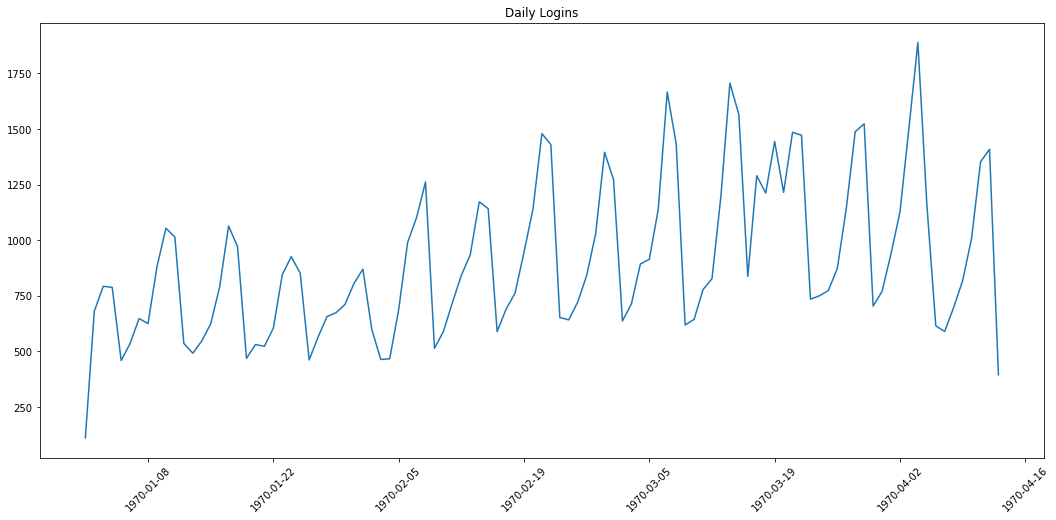

In [11]:
import matplotlib.pyplot as plt 
plt.title('Daily Logins')
plt.plot(login_dfd)
plt.xticks(rotation=45)
plt.show()


We need to split the data into next detail level. There is clearly some pattern Lets look at the monthly logins if we could pick some trends.

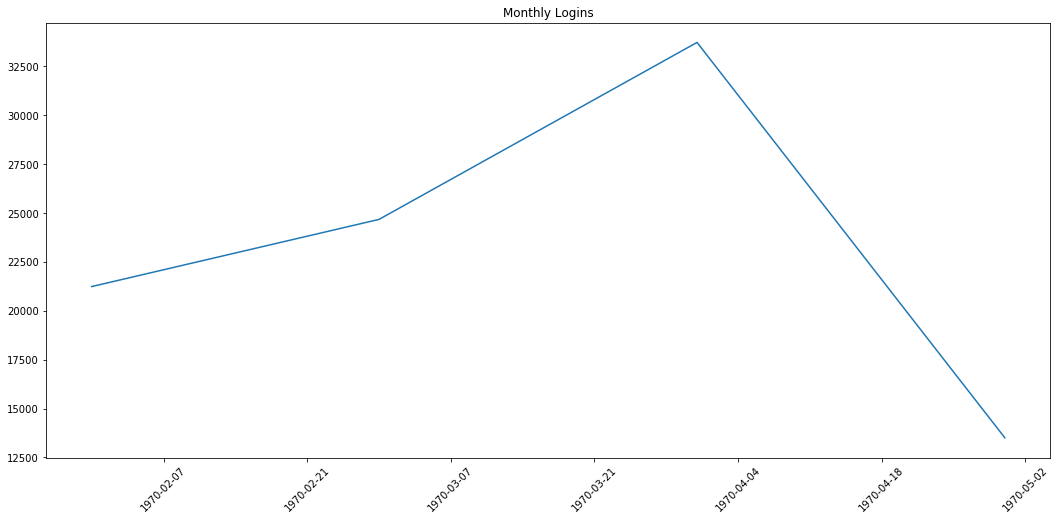

In [12]:
import matplotlib.pyplot as plt 
plt.title('Monthly Logins')
plt.plot(login_dfm)
plt.xticks(rotation=45)
plt.show()

#### Interestingly, logins show an increasing trend for the first quarter and decreasing trend in April. Lets dig dipper and look at the overall pattern for 1st quarter

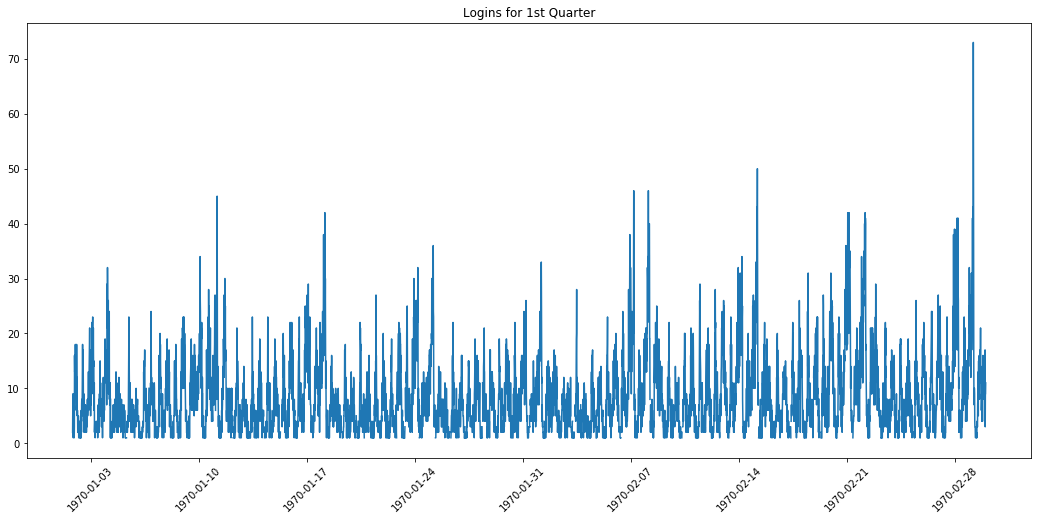

In [13]:
plt.plot(login_df['1970-01-01': '1970-03-01'])
plt.title('Logins for 1st Quarter')
plt.xticks(rotation=45)
plt.show()

We see a consistent pattern of peeks and valleys for the first quarter. we would get to the next grain and visualize the logins by day of the week and see if we have some solid findings as we split by the days and weekends logins.

In [14]:
# Re-read in the data
login_df = pd.read_json('C:/ultimate_challenge/logins.json')
login_df = login_df.set_index('login_time')
#logins_df.reset_index(drop=False, inplace=True)

# Split by month into new dataframes
jan_df = login_df['1970-01-01': '1970-01-31']
jan_df.reset_index(drop=False, inplace=True)

feb_df = login_df['1970-02-01': '1970-02-28']
feb_df.reset_index(drop=False, inplace=True)

mar_df = login_df['1970-03-01': '1970-03-31']
mar_df.reset_index(drop=False, inplace=True)


# Show example
print('January df sample:\n\n{}'.format(jan_df.head()))

January df sample:

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


In [15]:
df_list = [jan_df,feb_df,mar_df]

In [16]:
# Create new day of week feature to aggregate on
for m in df_list:
    m['day_of_week'] = m['login_time'].map(lambda x: x.weekday())
    
# Show example
# print('January df sample:\n\n{}'.format(jan_df.head()))
# Show example
print('January df sample:\n\n{}'.format(jan_df.head()))

January df sample:

           login_time  day_of_week
0 1970-01-01 20:13:18            3
1 1970-01-01 20:16:10            3
2 1970-01-01 20:16:37            3
3 1970-01-01 20:16:36            3
4 1970-01-01 20:26:21            3


In [17]:
def monthly_trend(df, title, weekends=False):
    new_df = df.set_index('login_time')

    for day in sorted(list(new_df['day_of_week'].unique())):

        temp = new_df[new_df['day_of_week'] == day]
        temp.drop('day_of_week', axis=1, inplace=True)
        temp['count'] = 1
        temp = temp.resample('15T').sum()
        
        if weekends == True:
            if day in [0,1,2,3,4]:
                color = 'grey'
            else:
                color = 'black'
            plt.plot(temp, color=color)
            plt.title(title)
            plt.xticks(rotation=45)
         
        else:
            plt.plot(temp)
            plt.title(title)
            plt.xticks(rotation=45)
            
            

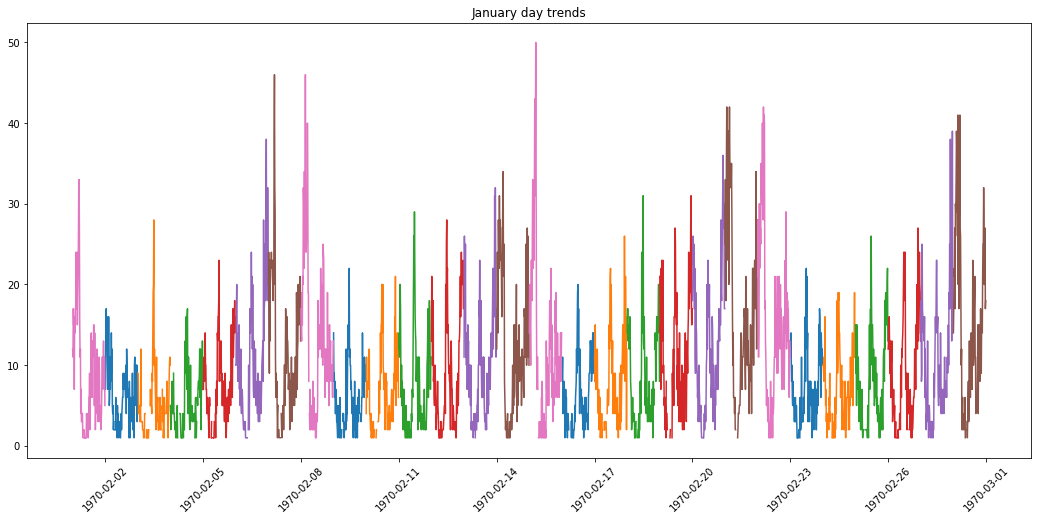

In [18]:
monthly_trend(feb_df, title='January day trends')

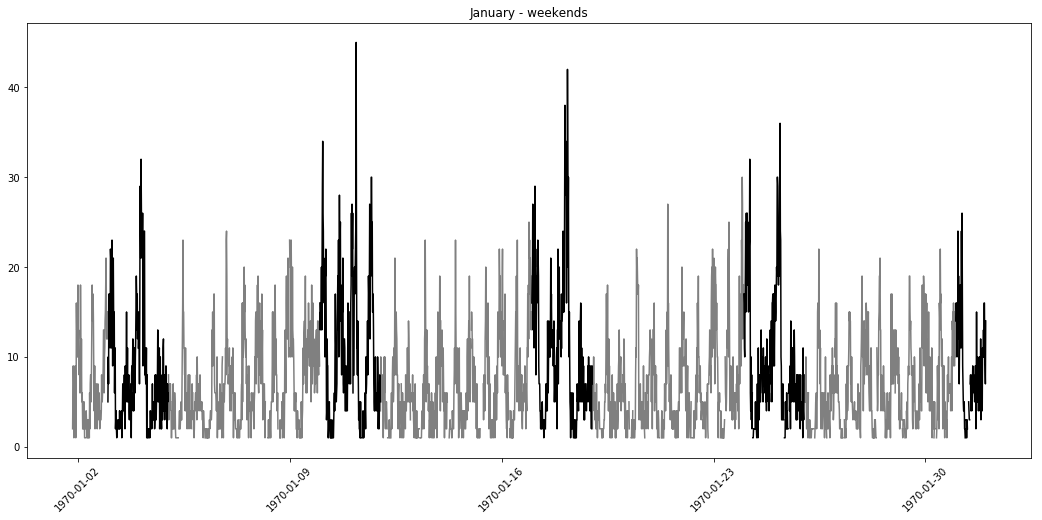

In [19]:
monthly_trend(jan_df, title='January - weekends', weekends=True)

#### We do see a trend here - weekday vs weekend for January. Weekends seem to be busiest across the weeks(black). Lets see if such is the case with other months as well.

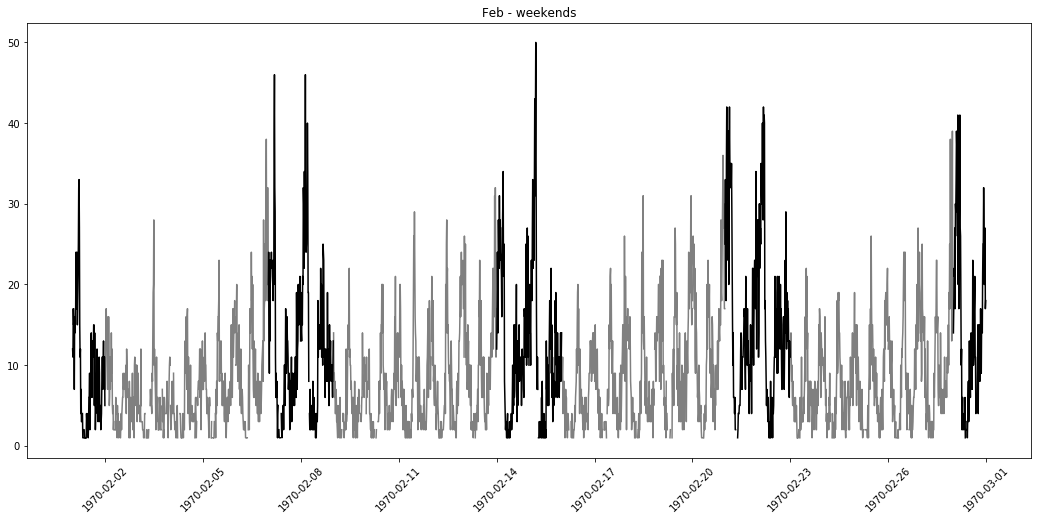

In [20]:
monthly_trend(feb_df, title='Feb - weekends', weekends=True)

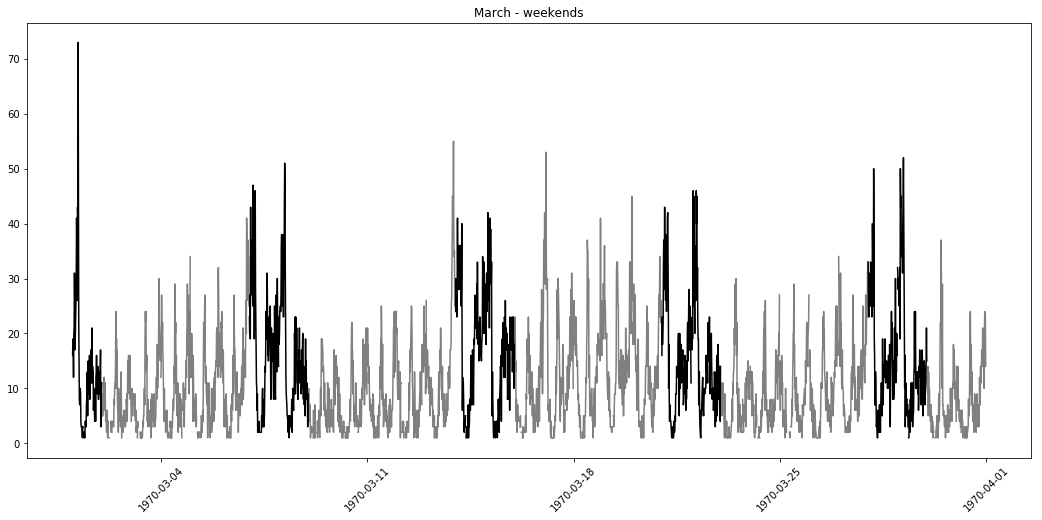

In [21]:
monthly_trend(mar_df, title='March - weekends', weekends=True)

EDA Conclusion:-
* We can see that there is a trend being followed in the number of logins.
* Login gradually picks up as we move along the week
* Logins are more during the weekends. 
* There is an increasing trend from January to April, However we do notice a downward trend post April.

Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: 
on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

ANSWER

Let's first identify the group of drivers.:-
* people who commute for work. --- that would impact the morning/day traffic as well evening to night traffic
* people who attend colleges --- that would again impact the day traffic but not as much as the previous group
* people who visit the place. ----that would impact the day traffic

For the fact that Ultimate City is active during the day, we could assume it must be either a downtown location where people commute to for work reasons thereby resulting an increased activity during daytime and likewise Gotham must be a residential hub. The increased traffic during the night might be attributed due to returning workers.

We could set up a hypothesis test based off of resulting increase and decrease in the activity due to reimbursement. Whether or not reimbursement of tolls impact the trend.
We could conduct one sample z-test assuming we would have a big sample size(n>30)
 * H0 = there is a difference in driver patterns after reimbursing tools.
 * HA = there is no difference in the driver pattern 

Steps that we can follow:

1. Compute z-statistic
2. find a confidence interval, assume alpha = 0.05 in case it's not stated'
3. use the standard normal table to find if the z-stat falls in the confidence interval. 
4. Accept if it falls within the range else reject the hypothesis.

Part 3 - Predictive modeling¶

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json.
* Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
* Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
* Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

#### Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [22]:
# Read in the data
import json
filename = 'C:\\ultimate_challenge\\ultimate_data_challenge.json'
file = open(filename, 'r')
login_data = pd.DataFrame(json.load(file))
file.close()
login_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [23]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


##### There are some numeric fields and object fields. We need to perform type conversion for:-

* Date fields to date type
* Float type to int 
* Categorical feature like phone, city to numeric fields
* Boolean data type to ints

In [24]:
# Date fields to date type
login_data['last_trip_date'] = pd.to_datetime(login_data['last_trip_date'])
login_data['signup_date'] = pd.to_datetime(login_data['signup_date'])

# # phone column to int
# phones = {'iPhone': 1, 'Android': 2}
# login_data['phone'] = login_data['phone'].map(lambda x: phones[x])

# city to int
cities = {'Winterfell': 1, 'Astapor': 2, "King's Landing": 3}
login_data['city'] = login_data['city'].map(lambda x: cities[x])

# map boolean values to int
login_data['ultimate_black_user'] = login_data['ultimate_black_user'].astype('int')


In [25]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null int64
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
dtypes: datetime64[ns](2), float64(6), int32(1), int64(2), object(1)
memory usage: 4.4+ MB


##### Next, we would look for columns which might be having missing columns.

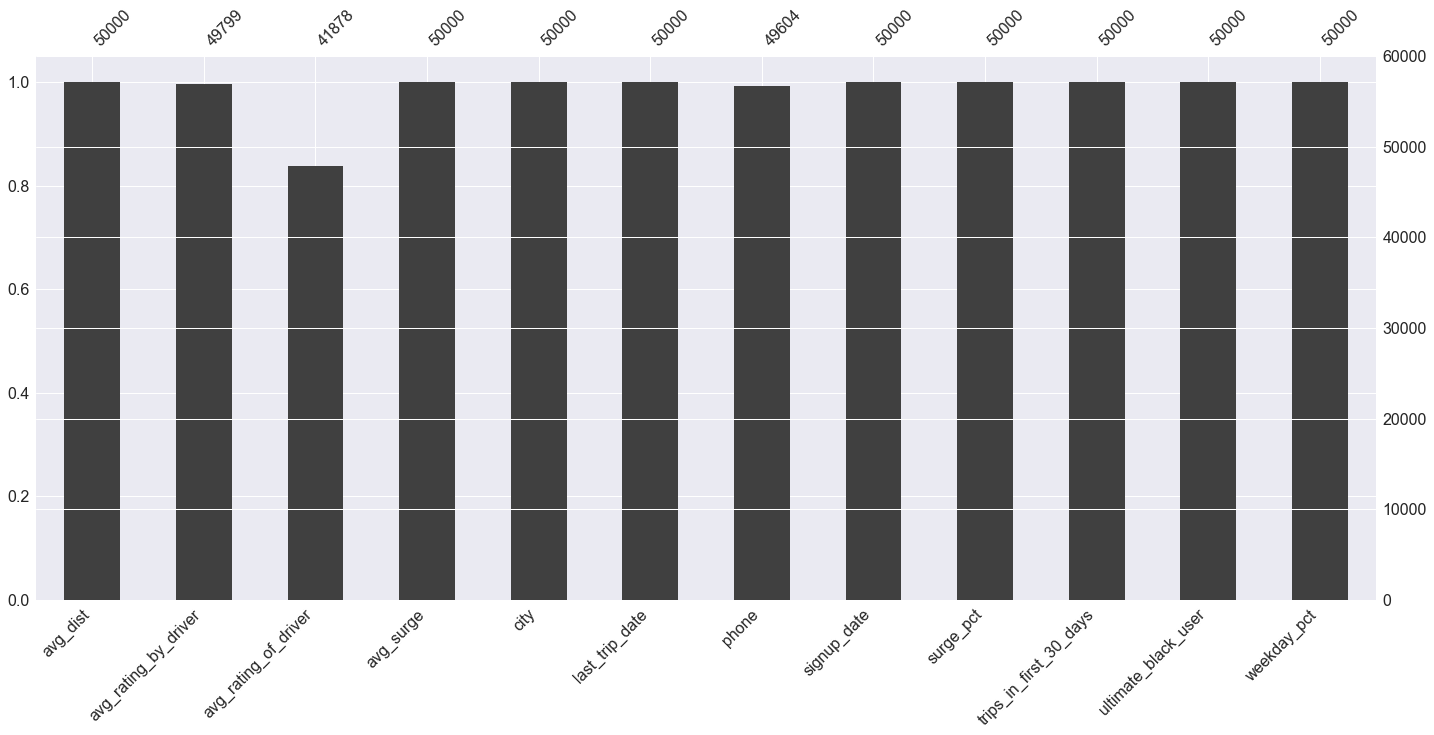

In [26]:
import missingno as msno
msno.bar(login_data)

##### avg_rating_of_driver, avg_rating_by_driver and phone need treated for missing values. Lets look at their distribution.

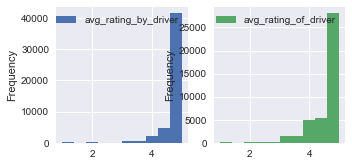

In [27]:
login_data[['avg_rating_by_driver', 'avg_rating_of_driver', 'phone']].\
plot(kind='hist', subplots=True, layout=(2,3), legend=True)
None


In [28]:
# Replacing null with mean values.
login_data['avg_rating_by_driver'].fillna(login_data['avg_rating_by_driver'].mean(), inplace=True)
login_data['avg_rating_of_driver'].fillna(login_data['avg_rating_of_driver'].mean(), inplace=True)
login_data['phone'].fillna('iPhone', inplace=True)
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null int64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
dtypes: datetime64[ns](2), float64(6), int32(1), int64(2), object(1)
memory usage: 4.4+ MB


##### lets look at the correlation matrix.

In [29]:
# Show the correlation matrix
corr_matrix = login_data.corr()
corr_matrix


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.079793,0.028508,-0.081491,-0.011120,-0.104414,-0.136329,0.032310,0.101652
avg_rating_by_driver,0.079793,1.000000,0.101660,0.010498,0.107463,0.019964,-0.039097,0.009328,0.020366
avg_rating_of_driver,0.028508,0.101660,1.000000,-0.021653,0.103406,-0.003290,-0.011060,-0.001916,0.012587
avg_surge,-0.081491,0.010498,-0.021653,1.000000,0.013036,0.793582,-0.001841,-0.078791,-0.110071
city,-0.011120,0.107463,0.103406,0.013036,1.000000,0.056918,-0.011517,0.054079,0.026142
surge_pct,-0.104414,0.019964,-0.003290,0.793582,0.056918,1.000000,0.005720,-0.106861,-0.144918
trips_in_first_30_days,-0.136329,-0.039097,-0.011060,-0.001841,-0.011517,0.005720,1.000000,0.112210,0.050388
ultimate_black_user,0.032310,0.009328,-0.001916,-0.078791,0.054079,-0.106861,0.112210,1.000000,0.035998
weekday_pct,0.101652,0.020366,0.012587,-0.110071,0.026142,-0.144918,0.050388,0.035998,1.000000


In [30]:
# check for features correlated at above 0.50 or below -0.50
corr_matrix[(abs(corr_matrix) >= 0.50) & (abs(corr_matrix) < 1.0)]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_by_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_of_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_surge,NaN,NaN,NaN,NaN,NaN,0.793582,NaN,NaN,NaN
city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surge_pct,NaN,NaN,NaN,0.793582,NaN,NaN,NaN,NaN,NaN
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ultimate_black_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Lets drop highly correlated fields.

In [31]:
# login_data.drop(['avg_surge','surge_pct'],1, inplace=True)
login_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,3,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2
1,8.26,5.0,5.0,1.00,2,2014-05-05,Android,2014-01-29,0.0,0,0,50.0
2,0.77,5.0,4.3,1.00,2,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0
3,2.36,4.9,4.6,1.14,3,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0
4,3.13,4.9,4.4,1.19,1,2014-03-15,Android,2014-01-27,11.8,14,0,82.4


##### What fraction of the observed users were retained?

##### As stated "we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days."  Lets find out which are the active users for the latest day to the preceeding 3 days in a new column "status" 
* 1-Active/retained
* 0-Not Active

In [33]:
def status_df(df):
    """Input =  dataframe
       Output = df with new column 
    """
    # get the most recent trip date
    recent_day = max(df['last_trip_date'])
    # 30 days preciding the last trip date
    days = [recent_day - datetime.timedelta(days=x) for x in range(0, 30)]
    # map functin to check if user is active in last 30 days
    df['status'] = df['last_trip_date'].map(lambda x: int(x in days))
    return df


In [34]:
df_retained = status_df(login_data)
df_retained.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,status
0,3.67,5.0,4.7,1.10,3,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,1
1,8.26,5.0,5.0,1.00,2,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,2,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,3,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,1,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


In [35]:
print(df_retained['status'].value_counts())

0    31690
1    18310
Name: status, dtype: int64


In [36]:
print ("Retained users= 18310")
print ("% of retailed users = 18310/50000 = 36.62%")

Retained users= 18310
% of retailed users = 18310/50000 = 36.62%


##### Prepping up the data for modeling

We would consider it as a Binary Classification problem where we would like to predict the retention based off of the features provided in the dataset.

* Target Variable = 
        'status'
* Input variable = 
       'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'city',
       'last_trip_date', 'phone', 'signup_date', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct', 'status'

* we would eliminate certain features which seem less important for our analysis. Example :- Signup date, last_trip_data
* we would also perform encoding on the categorical features- city, phone, ultimate black user'

In [37]:
# Generating dummies for categorical features
df_dummies = pd.get_dummies(df_retained, columns = ['city', 'phone', 'ultimate_black_user'])
df_dummies.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,status,city_1,city_2,city_3,phone_Android,phone_iPhone,ultimate_black_user_0,ultimate_black_user_1
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1,0,0,1,0,1,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0,0,1,0,1,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0,0,1,0,0,1,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1,0,0,1,0,1,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0,1,0,0,1,0,1,0


#### Applying moldeling techniques

In [39]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [40]:
# Split into train and test sets
train, test = train_test_split(df_dummies, test_size=.30, 
                               random_state=42, stratify=df_dummies['status'])

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

print('Train shape: {}\n Test shape: {}'.format(train.shape, test.shape))
test.info()

Train shape: (35000, 17)
 Test shape: (15000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
avg_dist                  15000 non-null float64
avg_rating_by_driver      15000 non-null float64
avg_rating_of_driver      15000 non-null float64
avg_surge                 15000 non-null float64
last_trip_date            15000 non-null datetime64[ns]
signup_date               15000 non-null datetime64[ns]
surge_pct                 15000 non-null float64
trips_in_first_30_days    15000 non-null int64
weekday_pct               15000 non-null float64
status                    15000 non-null int64
city_1                    15000 non-null uint8
city_2                    15000 non-null uint8
city_3                    15000 non-null uint8
phone_Android             15000 non-null uint8
phone_iPhone              15000 non-null uint8
ultimate_black_user_0     15000 non-null uint8
ultimate_black_user_1     15000 non-null uint8
dtypes: date

In [42]:
features = ['avg_dist'] +['surge_pct']+ ['avg_rating_by_driver'] + ['avg_rating_by_driver']+ ['weekday_pct']+ ['trips_in_first_30_days']+ ['phone_Android' ] + ['phone_iPhone'] + ['ultimate_black_user_0'] + ['ultimate_black_user_1'] +['city_1' ]+['city_2']+['city_3'] 
target = 'status'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X_train =train[features]
y_train =train[target]
X_test = test[features]
y_test= test[target]

X_test.head()


,avg_dist,surge_pct,avg_rating_by_driver,avg_rating_by_driver,weekday_pct,trips_in_first_30_days,phone_Android,phone_iPhone,ultimate_black_user_0,ultimate_black_user_1,city_1,city_2,city_3
0,6.26,0.0,4.3,4.3,25.0,1,0,1,0,1,1,0,0
1,11.27,50.0,5.0,5.0,100.0,0,0,1,1,0,1,0,0
2,2.15,0.0,4.9,4.9,100.0,4,0,1,0,1,0,0,1
3,1.96,28.6,4.9,4.9,85.7,0,0,1,1,0,0,1,0
4,5.55,0.0,5.0,5.0,25.0,1,0,1,0,1,0,0,1


###### Logistic Regression

In [43]:
# Define the model
lr = LogisticRegression()
lr_result= lr.fit(X_train, y_train)
lr_pred = lr_result.predict(X_test)
    
# # And finally: show the results
print(classification_report(y_test, lr_pred))
a = accuracy_score(y_test, lr_pred)
print("Accuracy:")
print(a*100)
    

             precision    recall  f1-score   support

          0       0.75      0.86      0.80      9507
          1       0.67      0.49      0.57      5493

avg / total       0.72      0.73      0.71     15000

Accuracy:
72.5333333333


In [46]:
pd.DataFrame(list(zip(X_train,lr.coef_.T)))

,0,1
0,avg_dist,[-0.0378272486586]
1,surge_pct,[0.00195017109929]
2,avg_rating_by_driver,[-0.0915744274187]
3,avg_rating_by_driver,[-0.0915744274187]
4,weekday_pct,[0.000728327939473]
5,trips_in_first_30_days,[0.124281802726]
6,phone_Android,[-0.532769643328]
7,phone_iPhone,[0.58923991906]
8,ultimate_black_user_0,[-0.419107170706]
9,ultimate_black_user_1,[0.475577446438]


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
rf = RandomForestClassifier(n_estimators=10, min_samples_split=2)

rf_result=rf.fit(X_train,y_train)

rf_pred = rf_result.predict(X_test)
print(classification_report(y_test, rf_pred))
a = accuracy_score(y_test, rf_pred)
print("Accuracy:")
print(a*100)

             precision    recall  f1-score   support

          0       0.78      0.82      0.80      9507
          1       0.67      0.61      0.64      5493

avg / total       0.74      0.75      0.74     15000

Accuracy:
74.54


In [48]:
from sklearn import cross_validation

target = df_dummies['status']
train = df_dummies.drop(['last_trip_date', 'signup_date', 'status'], axis=1)

dt = DecisionTreeClassifier(max_depth=4)

cv = cross_validation.KFold(len(X_train), n_folds=5)

cv_count = 1
for traincv, testcv in cv:  
        preds = dt.fit(X_train.loc[list(traincv),:], 
                        y_train.loc[list(traincv),]).predict(X_train.loc[list(testcv),:])
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train.loc[testcv,], preds)

        print('Round {} CV\nAccuracy: {:.2f}\nAUC: {:.4f}\nConfusion Matrix:\n{}\n\n'\
                  .format(cv_count, accuracy_score(y_train.loc[testcv,], preds)*100, 
                          auc(false_positive_rate, true_positive_rate),
                          confusion_matrix(y_train.loc[testcv,], preds)))
        cv_count += 1



Round 1 CV
Accuracy: 75.49
AUC: 0.7220
Confusion Matrix:
[[3757  711]
 [1005 1527]]


Round 2 CV
Accuracy: 75.00
AUC: 0.7209
Confusion Matrix:
[[3672  737]
 [1013 1578]]


Round 3 CV
Accuracy: 75.00
AUC: 0.7194
Confusion Matrix:
[[3703  745]
 [1005 1547]]


Round 4 CV
Accuracy: 75.61
AUC: 0.7247
Confusion Matrix:
[[3741  712]
 [ 995 1552]]


Round 5 CV
Accuracy: 74.77
AUC: 0.7183
Confusion Matrix:
[[3665  740]
 [1026 1569]]




In [ ]:
# final_dt = dt.fit(X_train, y_train)
# X_test = test[features]
# y_test= test[target]

# y_pred = final_dt.predict(test)
# print('Test set accuracy: {:.2f}\nConfusion Matrix:\n{}'\
#           .format(accuracy_score(y_test, y_pred)*100, 
#                   confusion_matrix(y_target, y_preds)))



In [49]:
clf = tree.DecisionTreeClassifier()
clf_result = clf.fit(X_train,y_train)
clf_pred = clf_result.predict(X_test)
print(classification_report(y_test, clf_pred))
a = accuracy_score(y_test, clf_pred)
print("Accuracy:")
print(a*100)



NameError: name 'tree' is not defined

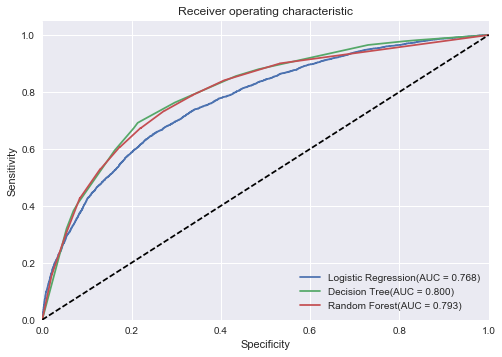

In [50]:
from sklearn import metrics
# calculate the fpr and tpr for all thresholds of the classification
probs_lr = lr.predict_proba(X_test)
preds_lr = probs_lr[:,1]

probs_dt = dt.predict_proba(X_test)
preds_dt = probs_dt[:,1]

probs_rf = rf.predict_proba(X_test)
preds_rf = probs_rf[:,1]


fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds_lr)
roc_auc_lr = metrics.auc(fpr1, tpr1)

fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds_dt)
roc_auc_dt = metrics.auc(fpr2, tpr2)

fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, preds_rf)
roc_auc_rf = metrics.auc(fpr4, tpr4)

# method I: plt
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1,tpr1,label='Logistic Regression(AUC = %0.3f)' % roc_auc_lr)
plt.plot(fpr2,tpr2,label='Decision Tree(AUC = %0.3f)' % roc_auc_dt)
# plt.plot(fpr3,tpr3,label='Naive Bayes(AUC = %0.3f)' % roc_auc_nb)
plt.plot(fpr4,tpr4,label='Random Forest(AUC = %0.3f)' % roc_auc_rf)
# plt.plot(fpr5,tpr5,label='kNN, n=21(AUC = %0.3f)' % roc_auc_knn)
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

We now have the best of all "decision tree" model that is about approximately 80% accurate and does a decent job of determining the difference between a retained and not retained user as displayed above in ROC plot.If the model sees more data related to retentions it would be even more accurate and F1 score would improve. However,we do have some good predictors in this dataset. Avg distance, average surge and trips in first 30 days and the device type seem to have good impact on the retention. 
City King's Landing has more retentions, Ultimate should focus on increasing accessibility in the other 2 cities.